In [6]:
import pandas as pd

data = pd.read_csv('weather_classification_data.csv')

In [8]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\Ys\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [24]:
print(data['Weather Type'])

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object


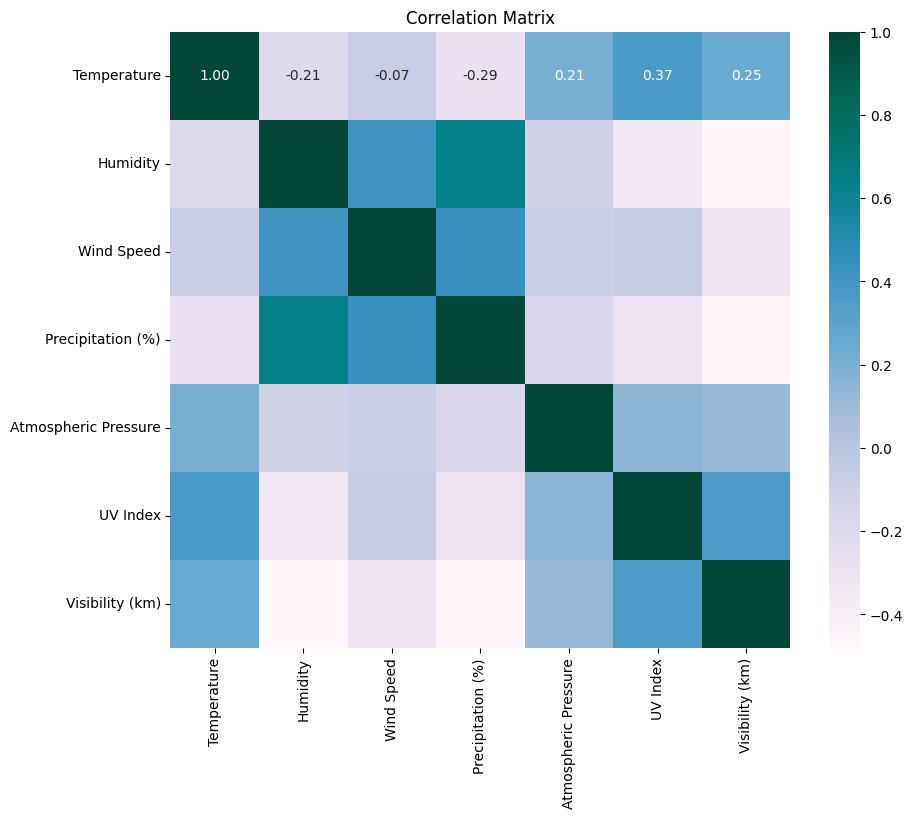

In [49]:
# 상관관계 행렬 계산
corr_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='PuBuGn', cbar=True)
plt.title('Correlation Matrix')
plt.show()

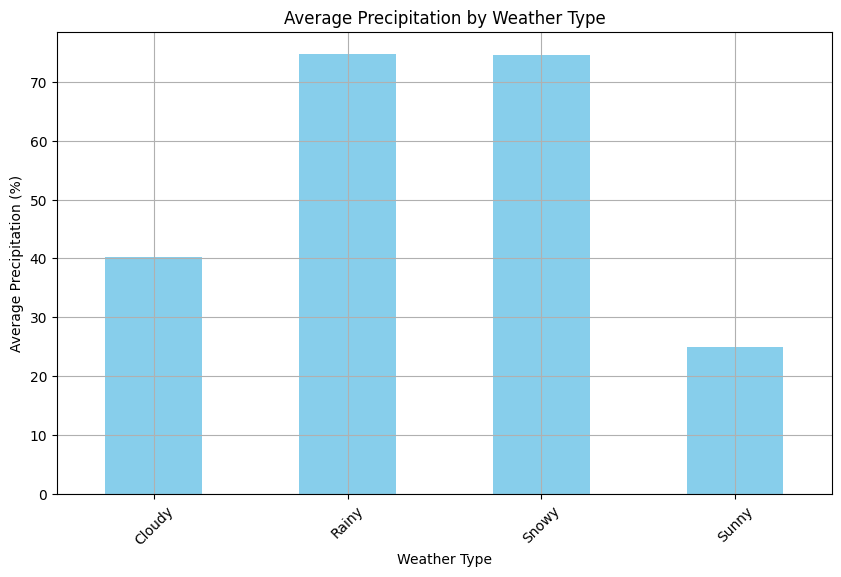

In [26]:
# 1. 막대그래프
import matplotlib.pyplot as plt

weather_precipitation = data.groupby('Weather Type')['Precipitation (%)'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
weather_precipitation.plot(kind='bar', color='skyblue')
plt.title('Average Precipitation by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Precipitation (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

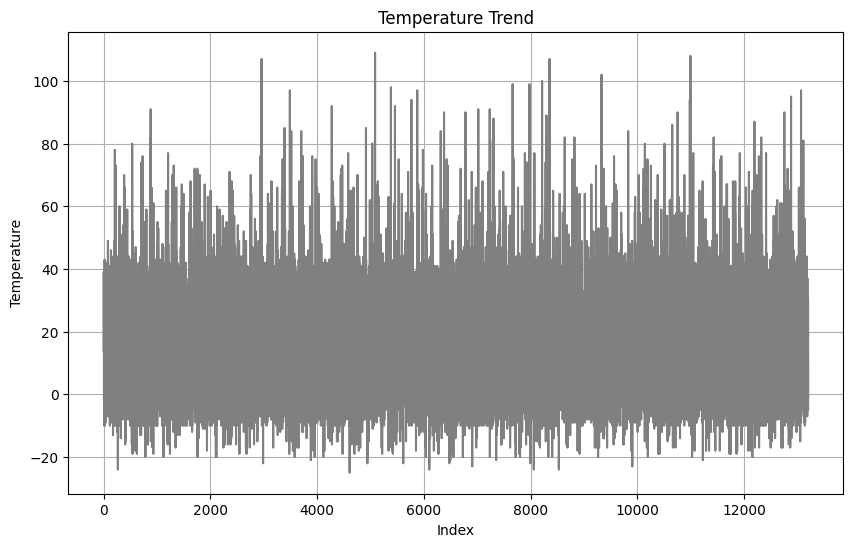

In [34]:
# 선 그래프 그리기
plt.figure(figsize=(10, 6))
data['Temperature'].plot(kind='line', color='grey')
plt.title('Temperature Trend')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

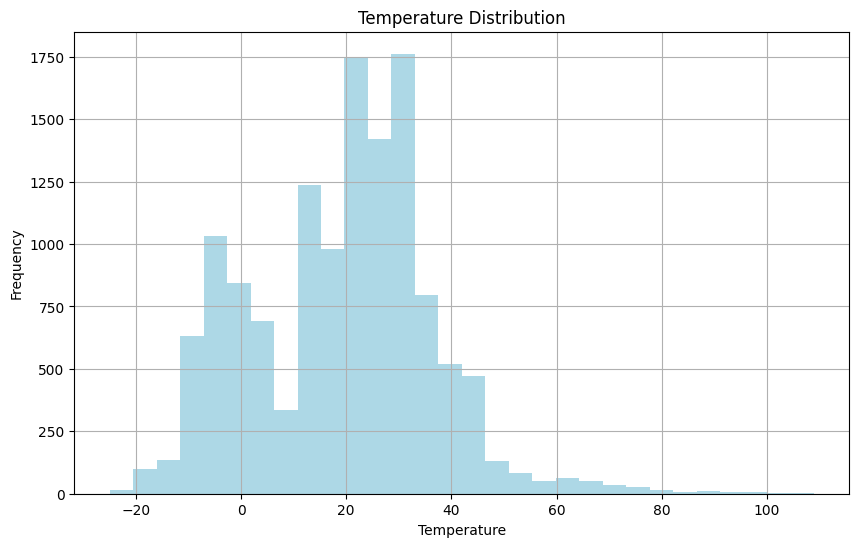

In [35]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
data['Temperature'].plot(kind='hist', bins=30, color='lightblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

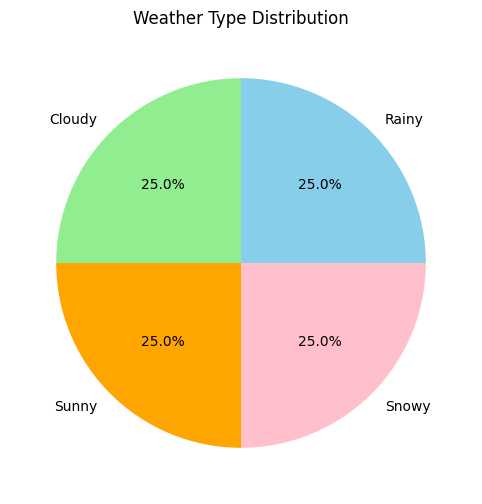

In [36]:
# Weather Type별 개수 계산
weather_counts = data['Weather Type'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Weather Type Distribution')
plt.ylabel('')
plt.show()

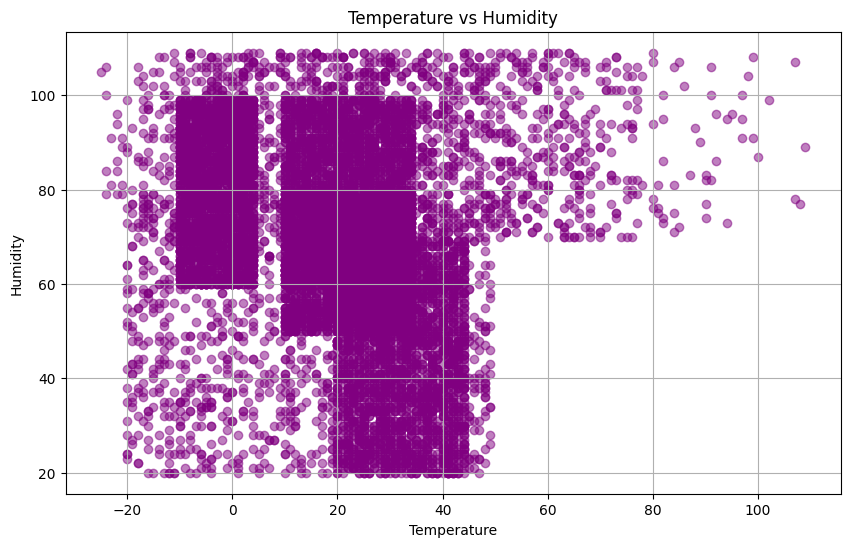

In [31]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Humidity'], color='purple', alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

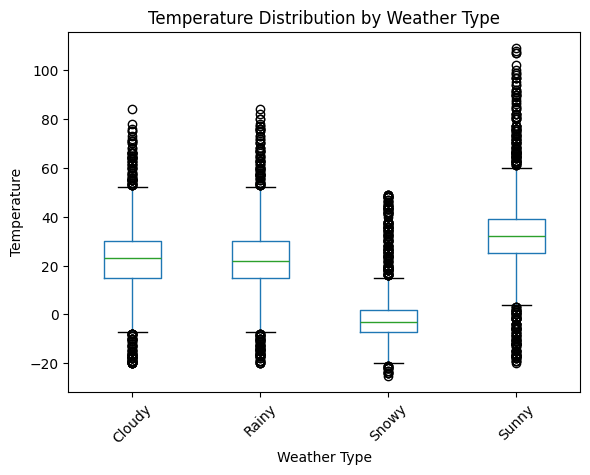

In [32]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
data.boxplot(column='Temperature', by='Weather Type', grid=False)
plt.title('Temperature Distribution by Weather Type')
plt.suptitle('') 
plt.xlabel('Weather Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

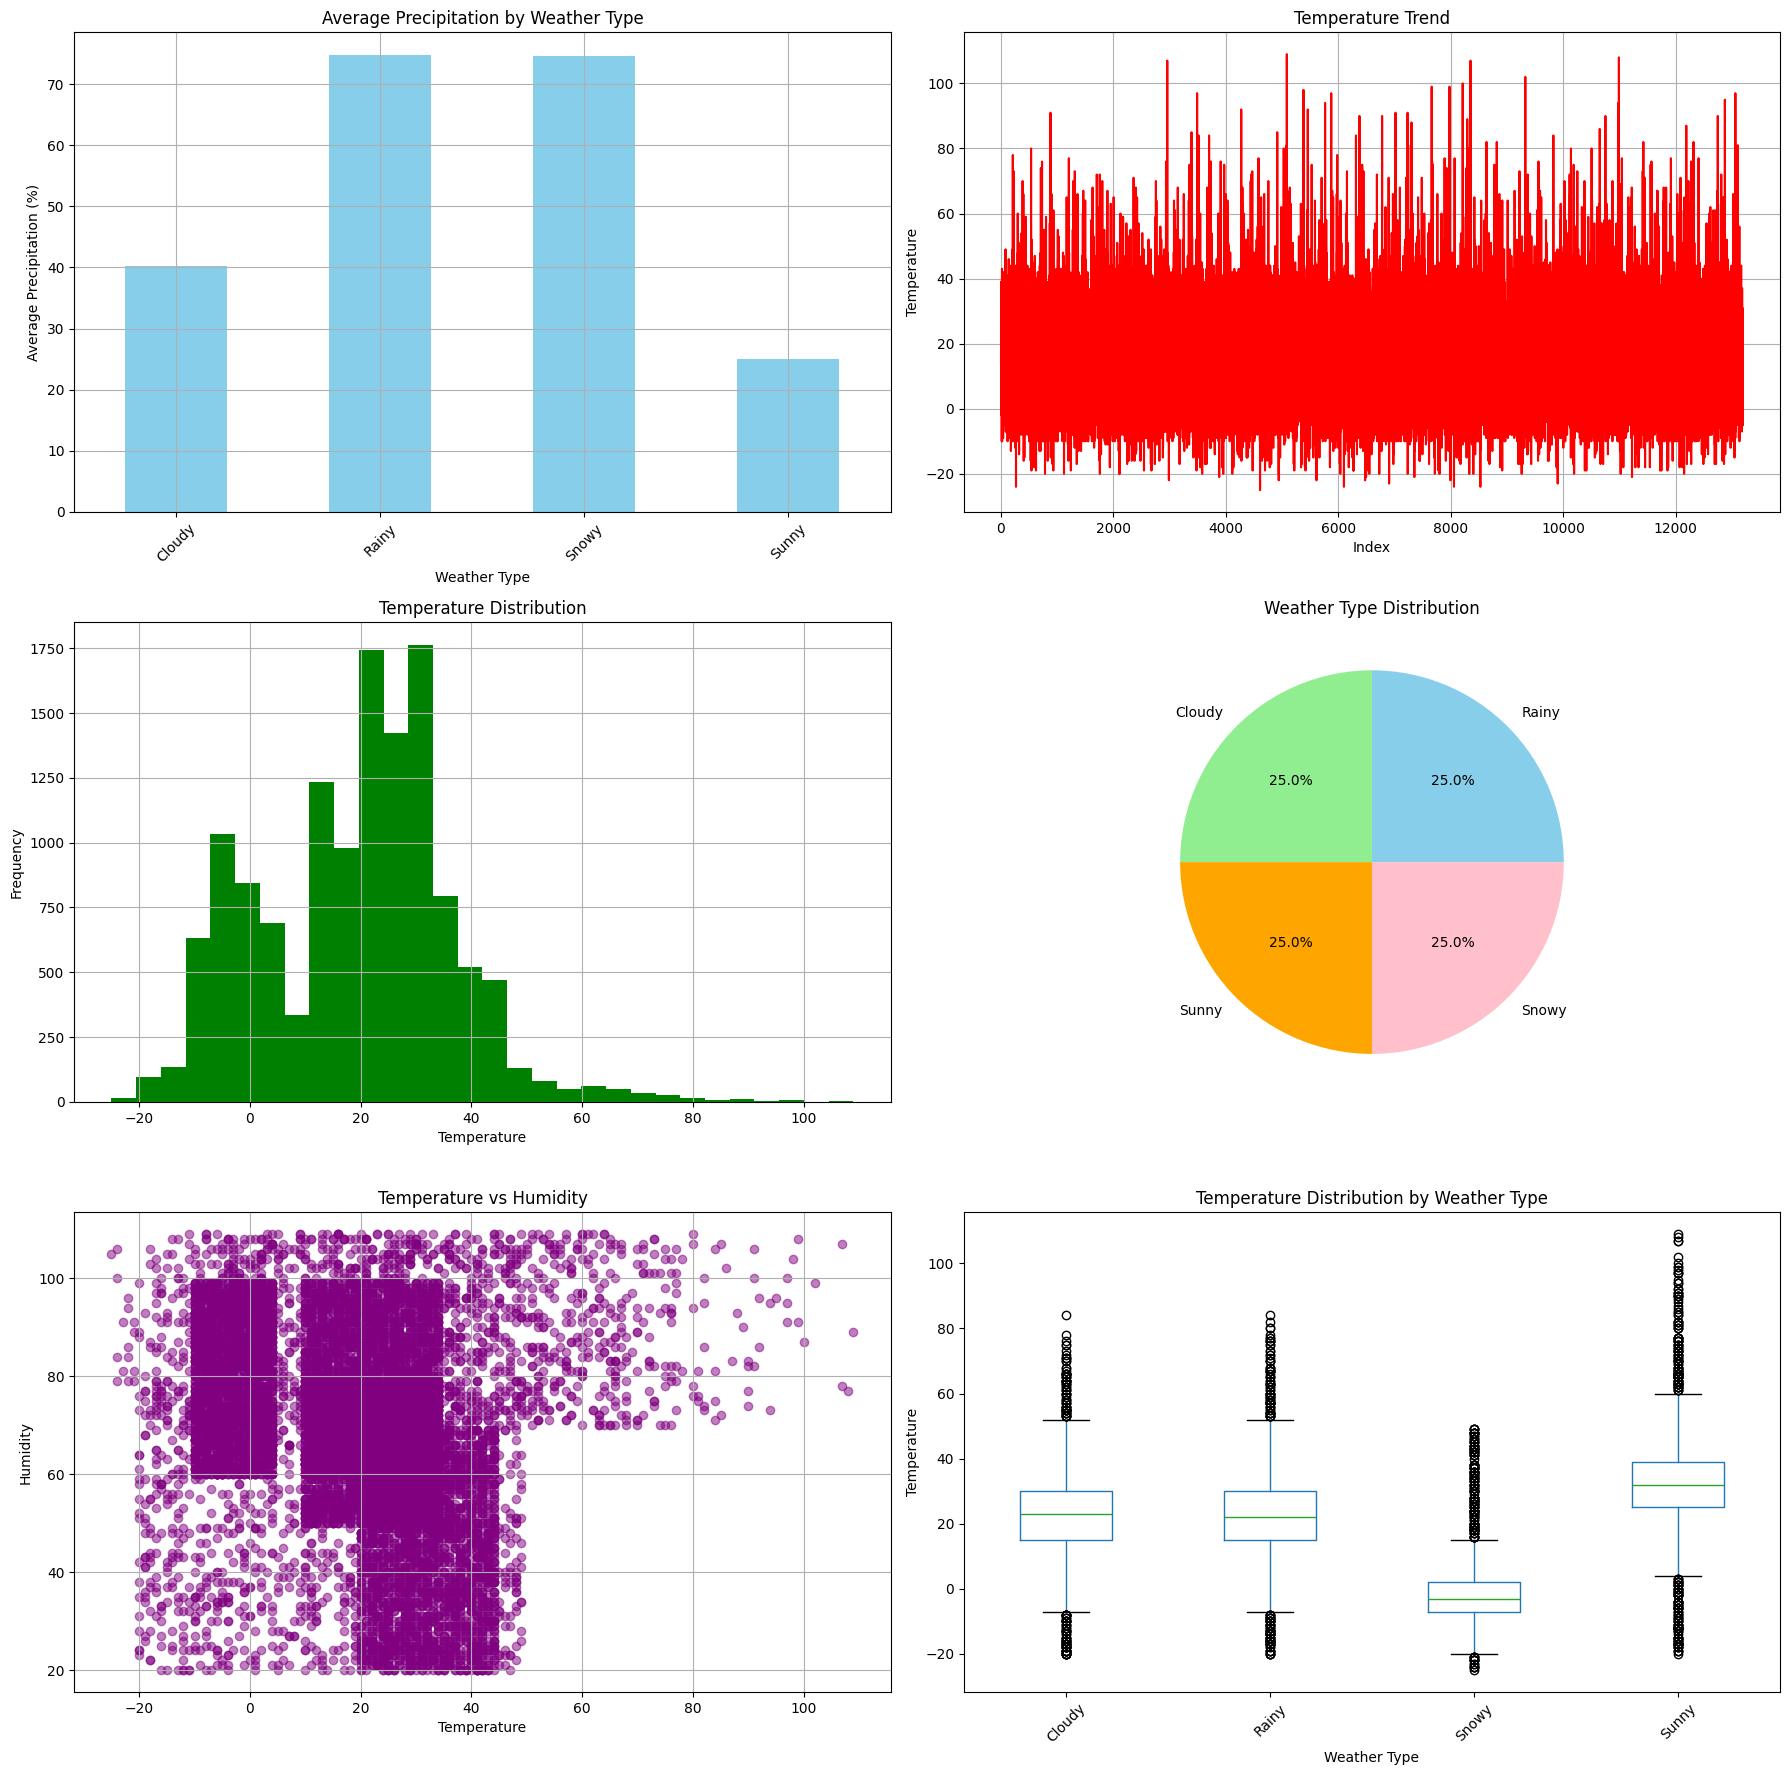

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Figure 생성
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# 1. 막대 그래프: Weather Type 별 Precipitation (%) 평균값
weather_precipitation = data.groupby('Weather Type')['Precipitation (%)'].mean()
weather_precipitation.plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Average Precipitation by Weather Type')
axs[0, 0].set_xlabel('Weather Type')
axs[0, 0].set_ylabel('Average Precipitation (%)')
axs[0, 0].grid(True)
axs[0, 0].set_xticklabels(weather_precipitation.index, rotation=45)

# 2. 선 그래프: Temperature 추이
data['Temperature'].plot(kind='line', color='red', ax=axs[0, 1])
axs[0, 1].set_title('Temperature Trend')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Temperature')
axs[0, 1].grid(True)

# 3. 히스토그램: Temperature 분포
data['Temperature'].plot(kind='hist', bins=30, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Temperature Distribution')
axs[1, 0].set_xlabel('Temperature')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# 4. 파이 차트: Weather Type 분포
weather_counts = data['Weather Type'].value_counts()
weather_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink', 'yellow'], ax=axs[1, 1])
axs[1, 1].set_title('Weather Type Distribution')
axs[1, 1].set_ylabel('')

# 5. 산점도: Temperature vs Humidity
axs[2, 0].scatter(data['Temperature'], data['Humidity'], color='purple', alpha=0.5)
axs[2, 0].set_title('Temperature vs Humidity')
axs[2, 0].set_xlabel('Temperature')
axs[2, 0].set_ylabel('Humidity')
axs[2, 0].grid(True)

# 6. 박스플롯: Weather Type 별 Temperature 분포
data.boxplot(column='Temperature', by='Weather Type', grid=False, ax=axs[2, 1])
axs[2, 1].set_title('Temperature Distribution by Weather Type')
axs[2, 1].set_xlabel('Weather Type')
axs[2, 1].set_ylabel('Temperature')
axs[2, 1].set_xticklabels(weather_precipitation.index, rotation=45)
axs[2, 1].figure.suptitle('')  # 박스플롯의 기본 제목 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()